# Deep Learning - Predicting Diabetes

## Objective:
The objective is to create a model that predicts how diabetes progresses using the given independent variables. This model will help healthcare professionals see how different factors affect diabetes progression, which can help them create better treatment plans and preventive strategies. The goal is to provide clear insights into how diabetes develops in patients over time.

In [107]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading and Preprocessing

In [108]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Diabetes dataset
diabetes_data = load_diabetes()
X = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
y = pd.Series(diabetes_data.target)

In [109]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [110]:
X.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


## Exploratory Data Analysis (EDA)

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [112]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [113]:
X.shape

(442, 10)

In [114]:
X.size

4420

### Data Description
This dataset is related to a diabetes study.This containing 442 samples with 10 normalized features and a target variable. The features include patient metrics like age, sex, Body Mass Index (BMI), blood pressure, and six blood serum measurements (s1-s6). The target variable represents a quantitative measure of diabetes progression one year after baseline. This data is typically used to model and predict how different factors influence the progression of diabetes, aiding in the understanding and management of the disease.

In [115]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [116]:
# Check for missing values
print(X.isnull().sum())  # Assuming no missing values in this dataset

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [117]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


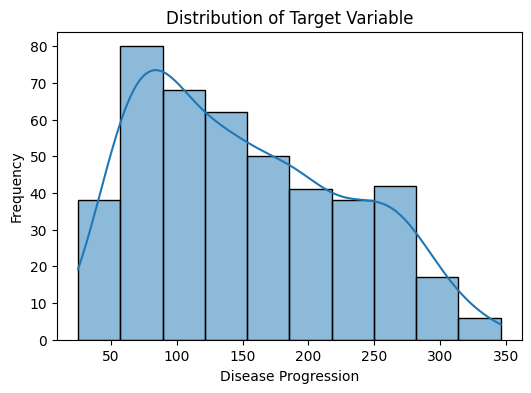

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of the target variable related to disease progression. Here are some insights:

Right-Skewed Distribution: The data is concentrated on the left side, indicating that most patients have lower disease progression values. The frequency decreases as the disease progression value increases.

Frequency Peaks: The highest frequency of disease progression values is around the lower end of the scale, suggesting that a significant number of patients have mild disease progression.

Outliers: There are fewer instances of high disease progression, which could be outliers or rare cases.

Trend Line: The overlaying line graph, likely representing a probability distribution, follows the same right-skewed pattern, reinforcing the observation that lower disease progression values are more common.


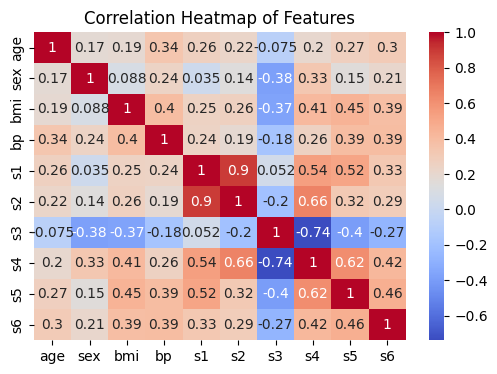

In [140]:
# Correlation heatmap
plt.figure(figsize=(6,4))
correlation_matrix = pd.DataFrame(X_scaled, columns=diabetes_data.feature_names).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


A correlation heatmap of various features. Here are some insights:

Strong Positive Correlations:
s3 and s4: These features have a strong positive correlation, indicating that as one increases, the other tends to increase as well.
bmi and bp: These features also show a strong positive correlation, suggesting a relationship between body mass index and blood pressure.

Strong Negative Correlations:
bmi and s2: There’s a strong negative correlation here, meaning that as BMI increases, the value of s2 tends to decrease.


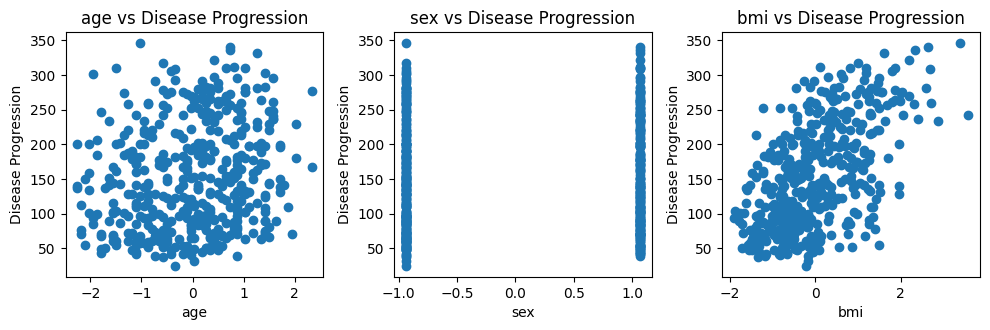

In [139]:
# Scatter plot of a few features vs target
plt.figure(figsize=(10, 6))
for i, feature in enumerate(diabetes_data.feature_names[:3]):  # Visualizing only first 3 for brevity
    plt.subplot(2, 3, i + 1)
    plt.scatter(X_scaled[:, i], y)
    plt.title(f'{feature} vs Disease Progression')
    plt.xlabel(feature)
    plt.ylabel('Disease Progression')
plt.tight_layout()
plt.show()


Age vs Disease Progression:
There appears to be a slight positive correlation between age and disease progression, indicating that older individuals might experience higher disease progression.

Sex vs Disease Progression:
The data points are spread out, suggesting no clear correlation between sex and disease progression. This implies that disease progression is relatively independent of sex.

BMI vs Disease Progression:
There seems to be a moderate positive correlation between BMI and disease progression. Higher BMI values are associated with higher disease progression, indicating that body mass index could be a significant factor in disease progression.


## Building the ANN Model

In [121]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Building the ANN model
model = models.Sequential([
    layers.InputLayer(input_shape=(X_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


## Training the ANN Model

In [136]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2082.4783 - mean_squared_error: 2082.4783 - val_loss: 3067.8521 - val_mean_squared_error: 3067.8521
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2152.0796 - mean_squared_error: 2152.0796 - val_loss: 3068.9246 - val_mean_squared_error: 3068.9246
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1933.4111 - mean_squared_error: 1933.4111 - val_loss: 3053.8147 - val_mean_squared_error: 3053.8147
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1737.1775 - mean_squared_error: 1737.1775 - val_loss: 3060.8293 - val_mean_squared_error: 3060.8293
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2010.4457 - mean_squared_error: 2010.4457 - val_loss: 3081.4590 - val_mean_squared_error: 3081.4590
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1948.1091 - mean_squared_error: 1948.1091 - val_loss: 3070.3164 - val_mean_squared_error: 3070.3164
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2

## Evaluating the Model

In [137]:
# Evaluate the model on the testing data
test_loss, test_mse = model.evaluate(X_test, y_test, verbose=0)
print(f'Test MSE: {test_mse}')

# Calculating R² Score
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Test MSE: 2807.706787109375
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
R² Score: 0.47005917895698635


## Improving the Model

In [132]:
# Experiment with a different architecture or hyperparameters
# Example: Adding more layers and changing the activation function

model_improved = models.Sequential([
    layers.InputLayer(input_shape=(X_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_improved.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the improved model
history_improved = model_improved.fit(X_train, y_train, epochs=150, validation_split=0.2, batch_size=32, verbose=2)


Epoch 1/150
9/9 - 1s - 148ms/step - loss: 31470.2695 - mean_squared_error: 31470.2695 - val_loss: 22338.1035 - val_mean_squared_error: 22338.1035
Epoch 2/150
9/9 - 0s - 6ms/step - loss: 31203.8184 - mean_squared_error: 31203.8184 - val_loss: 22084.1621 - val_mean_squared_error: 22084.1621
Epoch 3/150
9/9 - 0s - 8ms/step - loss: 30755.0430 - mean_squared_error: 30755.0430 - val_loss: 21585.0098 - val_mean_squared_error: 21585.0098
Epoch 4/150
9/9 - 0s - 8ms/step - loss: 29862.1426 - mean_squared_error: 29862.1426 - val_loss: 20610.1621 - val_mean_squared_error: 20610.1621
Epoch 5/150
9/9 - 0s - 8ms/step - loss: 28128.3223 - mean_squared_error: 28128.3223 - val_loss: 18855.3848 - val_mean_squared_error: 18855.3848
Epoch 6/150
9/9 - 0s - 8ms/step - loss: 25114.1562 - mean_squared_error: 25114.1562 - val_loss: 16014.0137 - val_mean_squared_error: 16014.0137
Epoch 7/150
9/9 - 0s - 8ms/step - loss: 20412.2148 - mean_squared_error: 20412.2148 - val_loss: 12055.4150 - val_mean_squared_error: 1

In [133]:
# Evaluate the improved model
test_loss_improved, test_mse_improved = model_improved.evaluate(X_test, y_test, verbose=0)
y_pred_improved = model_improved.predict(X_test)
r2_improved = r2_score(y_test, y_pred_improved)

print(f'Improved Test MSE: {test_mse_improved}')
print(f'Improved R² Score: {r2_improved}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Improved Test MSE: 2717.11474609375
Improved R² Score: 0.4871580032605063


# Explanation of Code Improvements
Architecture Changes: Added more layers and neurons in the improved model to potentially capture more complex patterns.
Performance Comparison: Compare the original and improved model's performance to determine if the changes led to better results.